In [1]:
%load_ext autoreload
%autoreload 2

In [50]:
import numpy
import torch as tr
from torch import nn
from torch.nn.modules import loss as nn_loss
from torch import optim
from torch.nn import functional as F
from torch.nn import init

In [3]:
import models

### Hyper parameters

In [4]:
batch_size = 32
n_batch_logits = 32

### Model Definition

In [8]:
models.ToyGAN('name')

NameError: global name 'n_batch_logits' is not defined

In [206]:
class GNode(nn.Module):
    def __init__(self):
        super(GNode, self).__init__()
        self.gan = ToyGAN('node')
        self.
        
    @property
    def name(self):
        return self.gan.name

In [203]:
X = tr.randn(batch_size, 2)
Z = tr.randn(batch_size, 2)

### Training Algorithm

In [207]:
gnode = GNode()

In [208]:
gnode.name

'node'

In [179]:
for i in range(2000):
    loss = gnode.step_train_generator(X, Z)
    if i % 100 == 99:
        print i+1, loss.item()
#     if i % 500 == 0:
#         th.save(encoder.state_dict(), 'encoder.pt')
#         th.save(decoder.state_dict(), 'decoder.pt')

#         print 'Iter', i + 1, 'Loss:', loss.item()

100 0.000746602076106
200 0.000490726146381
300 0.000549918098841
400 0.000476552580949
500 0.000618054822553
600 0.000486454227939
700 0.000501346599776
800 0.000522457936313
900 0.00167619576678
1000 0.000612011353951
1100 0.000590900890529
1200 0.00168046774343
1300 0.000455711066024
1400 0.0034185484983
1500 0.000440988864284
1600 0.000520631379914
1700 0.000514960265718
1800 0.000612952164374
1900 0.000442196294898
2000 0.000615778611973


In [12]:
[(1, 2) for _ in range(10)].flatten()

AttributeError: 'list' object has no attribute 'flatten'

In [30]:
class NLinear(nn.Module):
    def __init__(self, in_features, units):
        super(NLinear, self).__init__()
        units = [in_features] + units
        self.layers = []
        for i in range(len(units) - 1):
            in_feat, out_feat = units[i:i + 2]
            self.layers.append(nn.Linear(in_feat, out_feat))
            self.layers.append(nn.ELU())
        self.model = nn.Sequential(*self.layers)
    
    def forward(self, x):
        return self.model(x)
        

In [37]:
nlin = NLinear(2, [32,64,128,64])

In [38]:
nlin.state_dict().keys()

['model.0.weight',
 'model.0.bias',
 'model.2.weight',
 'model.2.bias',
 'model.4.weight',
 'model.4.bias',
 'model.6.weight',
 'model.6.bias']

In [67]:
nlin(tr.ones(100, 2)).shape

torch.Size([100, 64])

In [83]:
weights = nlin.state_dict()['model.2.weight']

In [84]:
init.xavier_normal_(weights)

tensor([[-0.3313,  0.2526,  0.0956,  ..., -0.0932, -0.0777,  0.0456],
        [-0.0178, -0.2014,  0.0065,  ...,  0.0543, -0.1379,  0.0677],
        [ 0.0706,  0.3886, -0.1545,  ..., -0.0186,  0.1235,  0.0311],
        ...,
        [ 0.2164, -0.0614, -0.1378,  ...,  0.0166, -0.0035,  0.0383],
        [ 0.0457, -0.1377,  0.2726,  ...,  0.1598, -0.0641, -0.0086],
        [-0.1832, -0.1641, -0.0758,  ...,  0.0064,  0.1148,  0.0923]])

In [85]:
w = weights.view(-1).numpy()

In [86]:
from matplotlib import pyplot as plt
%matplotlib inline

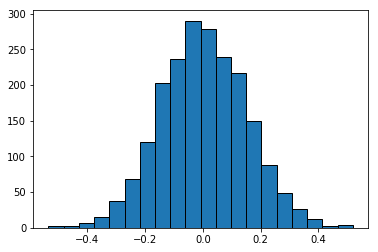

In [87]:
plt.hist(w, 20, ec='black');

In [88]:
init

<module 'torch.nn.init' from '/home/maharshi/.virtualenvs/py2dl/local/lib/python2.7/site-packages/torch/nn/init.pyc'>

In [89]:
def init_fn(m):
    if isinstance(m, nn.Linear):
        init.xavier_normal_(m.weight)
        init.constant_(m.bias, 0.01)
    
a = nlin.apply(init_fn)

In [91]:
from layers import NLinear

In [92]:
nlin = NLinear(2, [32, 64, 128, 32])